In [2]:
#Import all necessary packages
import numpy as np
import matplotlib.pyplot as plt
import rasterio as ra
import geopandas as gpd
import py3dep as py3
import folium as fo
import fiona
import shapely
import pysensors as ps
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [3]:
fiona.listlayers('Civil_Department_Landscape_2024.gdb')

['Landscape_with_Irrigation']

In [4]:

gdb_path = 'Civil_Department_Landscape_2024.gdb'

# Open the GDB file and list all layers

gdf = gpd.read_file(gdb_path, layer='Landscape_with_Irrigation')

# Now `gdf` contains the vector data from the chosen layer
test = gdf['geometry']
combined_multipolygon = shapely.unary_union(gdf['geometry'].to_crs("EPSG:4326"))


In [5]:
#Get the elevation Data for the desired area
elevation_data = py3.get_dem(combined_multipolygon, 1)

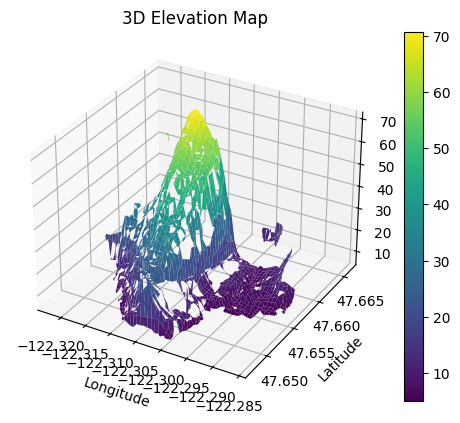

[[-122.32214635 -122.32213304 -122.32211973 ... -122.28642827
  -122.28641496 -122.28640165]
 [-122.32214635 -122.32213304 -122.32211973 ... -122.28642827
  -122.28641496 -122.28640165]
 [-122.32214635 -122.32213304 -122.32211973 ... -122.28642827
  -122.28641496 -122.28640165]
 ...
 [-122.32214635 -122.32213304 -122.32211973 ... -122.28642827
  -122.28641496 -122.28640165]
 [-122.32214635 -122.32213304 -122.32211973 ... -122.28642827
  -122.28641496 -122.28640165]
 [-122.32214635 -122.32213304 -122.32211973 ... -122.28642827
  -122.28641496 -122.28640165]]
[[47.6660955  47.6660955  47.6660955  ... 47.6660955  47.6660955
  47.6660955 ]
 [47.66608651 47.66608651 47.66608651 ... 47.66608651 47.66608651
  47.66608651]
 [47.66607752 47.66607752 47.66607752 ... 47.66607752 47.66607752
  47.66607752]
 ...
 [47.64753048 47.64753048 47.64753048 ... 47.64753048 47.64753048
  47.64753048]
 [47.64752149 47.64752149 47.64752149 ... 47.64752149 47.64752149
  47.64752149]
 [47.6475125  47.6475125  4

In [6]:
#print(elevation_data)
# Convert the DataArray to a numpy array
elevation_array = elevation_data.values

# Create 2D arrays for x and y coordinates
x = elevation_data.x.values
y = elevation_data.y.values

# Create a meshgrid for the x and y coordinates
X, Y = np.meshgrid(x, y)

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, elevation_array, cmap='viridis', edgecolor='none')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Elevation (m)')
plt.title('3D Elevation Map')

# Add a color bar which maps values to colors
fig.colorbar(surf)

# Show the plot
plt.show()

print(X)
print(Y)
print(np.nan_to_num(elevation_array))

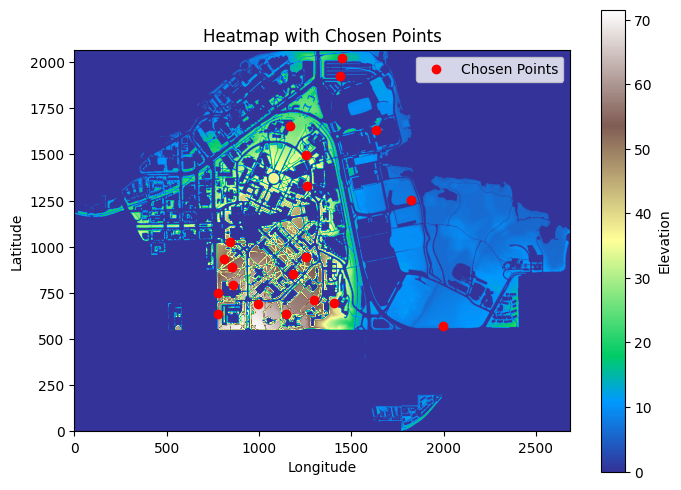

In [7]:
# Convert the DataArray to a numpy array
Z = np.nan_to_num(elevation_data.values)

# Create 2D arrays for x and y coordinates
X = elevation_data.x.values
Y = elevation_data.y.values

# Normalize Z coordinates to get probabilities
weights = Z.flatten() / np.sum(Z)

# Choose points based on weights
num_points_to_choose = 20  # Number of points to choose
chosen_indices = np.random.choice(len(weights), size=num_points_to_choose, p=weights)

# Convert 1D indices to 2D indices
chosen_indices_2d = np.unravel_index(chosen_indices, Z.shape)

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(Z, cmap='terrain', origin='lower', extent=[0, Z.shape[1], 0, Z.shape[0]])
plt.colorbar(label='Elevation')
plt.scatter(chosen_indices_2d[1], chosen_indices_2d[0], color='red', label='Chosen Points')
plt.title('Heatmap with Chosen Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(False)
plt.show()


[[-122.30775991   47.6588842    56.96290317]
 [-122.29948369   47.65499946   11.64349309]
 [-122.30756415   47.65484508   34.20993233]
 [-122.30826054   47.65423703   28.42011348]
 [-122.2935788    47.65550555    5.97846349]
 [-122.30698031   47.65701191   47.05480766]
 [-122.30716058   47.6521614    22.90963253]
 [-122.30932954   47.66056835   68.1456271 ]
 [-122.30548375   47.65447836   16.97054816]
 [-122.30660199   47.65623714   42.12446558]
 [-122.29671194   47.65711145    8.55928019]
 [-122.3087105    47.65982834   61.83950854]
 [-122.3073686    47.65785655   52.19987743]
 [-122.30340462   47.65491703   14.3309573 ]
 [-122.30625259   47.65404169   19.86072607]
 [-122.30834864   47.65461258   31.13372244]
 [-122.30721501   47.65279132   25.40772645]
 [-122.30666767   47.65526342   37.73674702]
 [-122.29858585   47.65687229    9.99748201]
 [-122.29544004   47.65595738    7.22201792]]


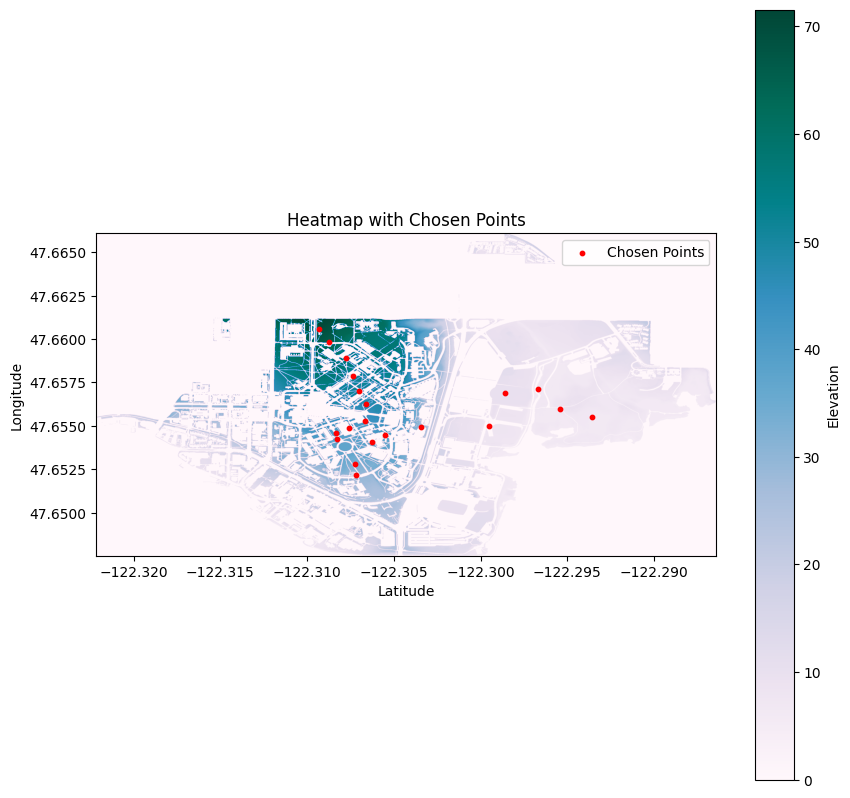

In [23]:
# Convert the DataArray to a numpy array
Z = np.nan_to_num(elevation_data.values)

# Create 2D arrays for x and y coordinates
X, Y = np.meshgrid(elevation_data.x.values, elevation_data.y.values)

# Flip the Y array to reverse the order of latitude
Y = np.flip(Y, axis=0)
Z = np.flip(Z, axis=0)

# Flatten the arrays
X_flat = X.flatten()
Y_flat = Y.flatten()
Z_flat = Z.flatten()

# Stack X, Y, and Z arrays
points = np.column_stack((X_flat, Y_flat, Z_flat))

# Filter out points with zero elevation
non_zero_points = points[points[:, 2] != 0]

# Specify the bounds for clustering
x_min, x_max = X.min(), X.max()
y_min, y_max = Y.min(), Y.max()

# Choose the number of clusters (points to choose)
num_clusters = 20

# Perform K-means clustering within specified bounds
kmeans = KMeans(n_clusters=num_clusters, random_state=32)
kmeans.fit(non_zero_points[(non_zero_points[:, 0] >= x_min) & (non_zero_points[:, 0] <= x_max) & (non_zero_points[:, 1] >= y_min) & (non_zero_points[:, 1] <= y_max)])

# Get the centroids of the clusters
chosen_points = kmeans.cluster_centers_
print(chosen_points)

# Plot heatmap with flipped latitude
plt.figure(figsize=(10, 10))
plt.imshow(Z, cmap='PuBuGn', origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.colorbar(label='Elevation')
plt.scatter(chosen_points[:, 0], chosen_points[:, 1], color='red', label='Chosen Points', marker='o', s=10)
plt.title('Heatmap with Chosen Points')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid(False)
plt.show()
